# Ghouls, Goblins, and Ghosts... Boo!
https://www.kaggle.com/competitions/ghouls-goblins-and-ghosts-boo

In [1]:
import sys, os

module_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

if module_path not in sys.path:
    sys.path.insert(0, module_path)

from fedotllm.main import FedotAI
from fedotllm.output import JupyterOutput
from fedotllm.llm import AIInference
from examples.kaggle import download_from_kaggle, submit_to_kaggle

competition_name = "ghouls-goblins-and-ghosts-boo"
dataset_path = os.path.join(os.getcwd(), "competition")
download_from_kaggle(competition_name=competition_name, save_path=dataset_path)

Extracting nested zip: /Users/aleksejlapin/Work/STABLE-FedotLLM/examples/ghouls-goblins-and-ghosts-boo/competition/test.csv.zip
Extracting nested zip: /Users/aleksejlapin/Work/STABLE-FedotLLM/examples/ghouls-goblins-and-ghosts-boo/competition/train.csv.zip
Extracting nested zip: /Users/aleksejlapin/Work/STABLE-FedotLLM/examples/ghouls-goblins-and-ghosts-boo/competition/sample_submission.csv.zip
Dataset downloaded and extracted to /Users/aleksejlapin/Work/STABLE-FedotLLM/examples/ghouls-goblins-and-ghosts-boo/competition


In [2]:
description="""Get out your dowsing rods, electromagnetic sensors, … and gradient boosting machines. Kaggle is haunted and we need your help. After a month of making scientific observations and taking careful measurements, we’ve determined that 900 ghouls, ghosts, and goblins are infesting our halls and frightening our data scientists. When trying garlic, asking politely, and using reverse psychology didn't work, it became clear that machine learning is the only answer to banishing our unwanted guests.
So now the hour has come to put the data we’ve collected in your hands. We’ve managed to identify 371 of the ghastly creatures, but need your help to vanquish the rest. And only an accurate classification algorithm can thwart them. Use bone length measurements, severity of rot, extent of soullessness, and other characteristics to distinguish (and extinguish) the intruders. Are you ghost-busters up for the challenge?
Evaluation
Submissions are evaluated on the categorization accuracy (the percent of creatures that you correctly classify).

File descriptions
train.csv - the training set
test.csv - the test set
sample_submission.csv - a sample submission file in the correct format
Data fields
id - id of the creature
bone_length - average length of bone in the creature, normalized between 0 and 1
rotting_flesh - percentage of rotting flesh in the creature
hair_length - average hair length, normalized between 0 and 1
has_soul - percentage of soul in the creature
color - dominant color of the creature: 'white','black','clear','blue','green','blood'
type - target variable: 'Ghost', 'Goblin', and 'Ghoul'
"""

In [3]:
import shutil
output_path = os.path.join(os.getcwd(), 'output')
if os.path.exists(output_path):
    shutil.rmtree(output_path)
os.makedirs(output_path, exist_ok=True)

inference = AIInference(model="github/gpt-4o-mini")
    
fedot_ai = FedotAI(
        task_path=dataset_path,
        inference=inference,
        workspace=output_path,
        handlers=JupyterOutput().subscribe
    )
async for _ in fedot_ai.ask(message=description):
    continue

================== HumanMessage ==================

Get out your dowsing rods, electromagnetic sensors, … and gradient boosting machines. Kaggle is haunted and we need your help. After a month of making scientific observations and taking careful measurements, we’ve determined that 900 ghouls, ghosts, and goblins are infesting our halls and frightening our data scientists. When trying garlic, asking politely, and using reverse psychology didn't work, it became clear that machine learning is the only answer to banishing our unwanted guests.
So now the hour has come to put the data we’ve collected in your hands. We’ve managed to identify 371 of the ghastly creatures, but need your help to vanquish the rest. And only an accurate classification algorithm can thwart them. Use bone length measurements, severity of rot, extent of soullessness, and other characteristics to distinguish (and extinguish) the intruders. Are you ghost-busters up for the challenge?
Evaluation
Submissions are evaluated on the categorization accuracy (the percent of creatures that you correctly classify).

File descriptions
train.csv - the training set
test.csv - the test set
sample_submission.csv - a sample submission file in the correct format
Data fields
id - id of the creature
bone_length - average length of bone in the creature, normalized between 0 and 1
rotting_flesh - percentage of rotting flesh in the creature
hair_length - average hair length, normalized between 0 and 1
has_soul - percentage of soul in the creature
color - dominant color of the creature: 'white','black','clear','blue','green','blood'
type - target variable: 'Ghost', 'Goblin', and 'Ghoul'


================== AutoMLAgent ===================

# Ghost Busting with Machine Learning: A Model Evaluation

## Overview  
**Problem:**   
Kaggle's haunted competition presents an intriguing challenge: classify 900 spooky creatures—goblins, ghosts, and ghouls—using collected data. With only 371 identified, we turned to machine learning to decipher these data-nabbing fiends. Using attributes like bone length, flesh rot, and soul percentage, our goal is to accurately classify each creature. 

**Goal:**  
The purpose of the model is to harness machine learning techniques to differentiate between these spectral entities. By analyzing various characteristics of the creatures, we aim to achieve a classification accuracy that aids Kaggle's data scientists in successfully identifying and banishing the remaining haunts from the halls.

## Data Preprocessing  
Before jumping into predictive modeling, we must clean and prepare our data.  
- **Handling Numerical Features:**  
  - We employed **mean imputation**: Much like filling in blanks during a quiz, if some creatures didn’t have a listed feature (like bone length), we used the average measured value for those missing entries.  
- **Encoding Categorical Features:**  
  - In our dataset, color is categorical (i.e., 'white', 'black', etc.). We converted this into numerical form using **One-Hot Encoding**, transforming each category into a binary format. For example, 'white' becomes `[1, 0, 0, 0, 0, 0]`.
- **Feature Scaling:**   
  - We applied **Standard Scaling** to normalize our features. This ensures that each attribute is on a similar scale, making it easier for the model to learn patterns. Numerical features like 'bone_length' were adjusted from varied ranges to a consistent format (mean of 0 and standard deviation of 1).

## Pipeline Summary  
Here's an overview of our modeling pipeline, focusing on the steps taken to optimize our ghost-busting efforts:

| Model       | Parameters                                                                  | Explanation                                             |
|-------------|-----------------------------------------------------------------------------|---------------------------------------------------------|
| CatBoost     | num_trees: 3000, learning_rate: 0.03, max_depth: 5, l2_leaf_reg: 0.01   | CatBoost utilizes gradient boosting, a strategy effective for classification tasks with high-dimensional data.|

This setup allows the model to learn effectively from our training data, fitting the complexities of ghostly characteristics without overfitting.

## Code Highlights:  
The following code snippets showcase critical areas of our implementation:

```python
def train_model(train_features: pd.DataFrame, train_target: pd.DataFrame):
    input_data = InputData.from_dataframe(train_features, train_target, task='classification')
    model = Fedot(problem=TaskTypesEnum.classification.value, timeout=60.0, seed=42)
    
    model.fit(features=input_data)  # Training step
    
    return model
```
This snippet outlines how we initiate the training of our model, feeding it our processed features and target labels so that it can learn to distinguish between the spectral classifications accurately.

## Metrics Table  
Here's a breakdown of our model's performance metrics:

| Metric     | Value | Explanation                               |  
|------------|-------|-------------------------------------------|  
| Accuracy   | 0.84  | Indicates that 84% of the time, our model accurately classifies the types of creatures.  |  

Accuracy tells us how often the model gets it right—an essential benchmark, especially in such a whimsical but serious competition!

## Takeaways  
Our machine learning model has successfully achieved an accuracy of **84%** in classifying the types of spectral creatures. This result signifies a potent ability to distinguish among the shades of the supernatural, demonstrating the model's valuable application in tackling similar classification challenges in real-world contexts. As we face the haunting specter of misclassification, this innovative solution brings us closer to a data-driven exorcism!

In [7]:
print("Files in output directory:")
for file in os.listdir(output_path):
    print(f"- {file}")

Files in output directory:
- pipeline
- solution.py
- submission.csv


In [1]:
import sys, os
output_path = os.path.join(os.getcwd(), 'output')
module_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

if module_path not in sys.path:
    sys.path.insert(0, module_path)
from examples.kaggle import submit_to_kaggle
competition_name = "ghouls-goblins-and-ghosts-boo"
submit_to_kaggle(competition_name=competition_name, submission_file=os.path.join(output_path, "submission.csv"))

Submitting to 'ghouls-goblins-and-ghosts-boo'...


100%|██████████| 5.27k/5.27k [00:00<00:00, 6.86kB/s]



Submission details:
Date: 2025-05-16 12:55:32.013000
Status: SubmissionStatus.COMPLETE
Public Score: 0.73345
Private Score: 0.73345


{"ref": 44812630, "totalBytes": 5399, "date": "2025-05-16T12:55:32.013Z", "description": "FedotLLM_submission_2025-05-16_15-55-30", "errorDescription": "", "fileName": "submission.csv", "publicScore": "0.73345", "privateScore": "0.73345", "status": "COMPLETE", "submittedBy": "alekseilapin", "submittedByRef": "alekseilapin", "teamName": "Aleksei Lapin", "url": "/submissions/44812630/44812630.raw"}

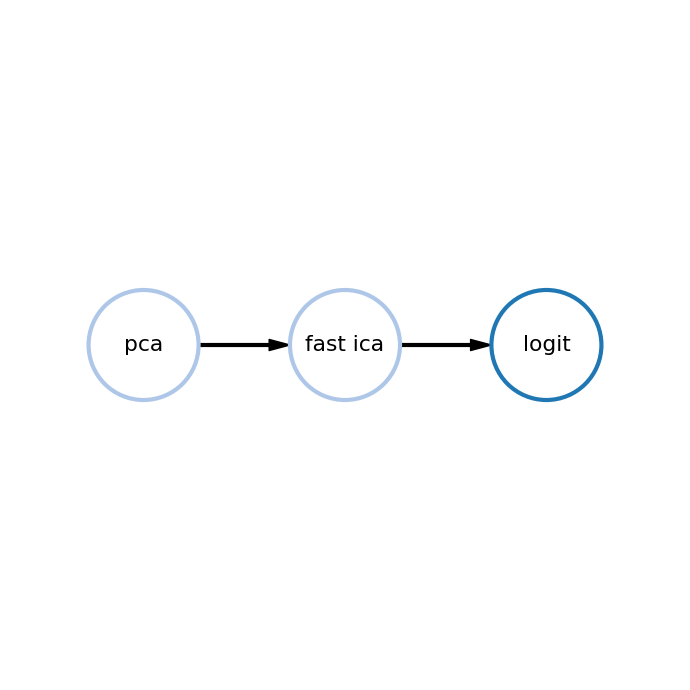

In [6]:
from fedot import Fedot
model = Fedot(problem="classification")
model.load(os.path.join(output_path, 'pipeline'))
model.current_pipeline.show()